<a href="https://colab.research.google.com/github/nisha-s10/Deep-Learning-Lab-AFI524/blob/main/Experiment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Libraries

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split

# Step 2: Generate Datasets

In [61]:
# ✅ Linearly Separable Dataset
X_linear, y_linear = make_classification(
    n_samples=500,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2.0,
    random_state=42
)

# ❌ Non-Linearly Separable Dataset
X_nonlinear, y_nonlinear = make_moons(
    n_samples=500,
    noise=0.35,
    random_state=42
)

# Step3: Inspect dataset values

In [62]:
print("X_linear shape:", X_linear.shape)
print("y_linear shape:", y_linear.shape)
print("\nFirst 5 samples (Linear Dataset):")
print(X_linear[:5])
print("Labels:", y_linear[:5])

print("\nX_nonlinear shape:", X_nonlinear.shape)
print("y_nonlinear shape:", y_nonlinear.shape)
print("\nFirst 5 samples (Non-Linear Dataset):")
print(X_nonlinear[:5])
print("Labels:", y_nonlinear[:5])

X_linear shape: (500, 2)
y_linear shape: (500,)

First 5 samples (Linear Dataset):
[[ 2.00845498 -2.04700975]
 [ 1.32602138  1.50254097]
 [ 2.02420498 -2.79714286]
 [ 1.12188007  0.05937142]
 [ 1.03909973  1.38236937]]
Labels: [0 1 0 0 1]

X_nonlinear shape: (500, 2)
y_nonlinear shape: (500,)

First 5 samples (Non-Linear Dataset):
[[ 0.83112983 -0.22095199]
 [ 1.28174095  0.94108088]
 [ 1.19241055 -0.4481165 ]
 [ 0.03496619  1.11285844]
 [ 0.51795802  1.59987228]]
Labels: [1 0 1 0 0]


# Step 4: Dataset Visualization

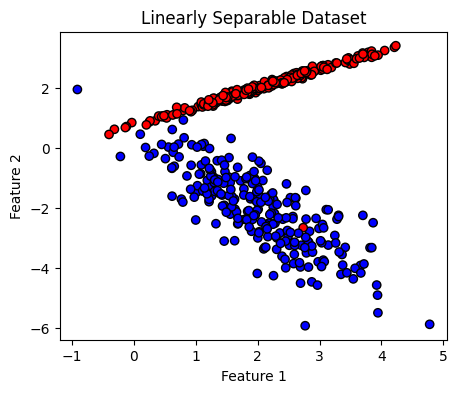

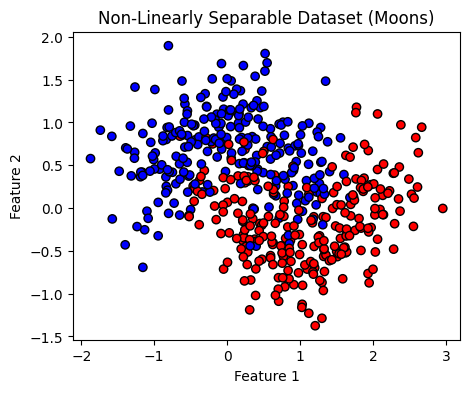

In [63]:
plt.figure(figsize=(5, 4))
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, cmap='bwr', edgecolor='k')
plt.title("Linearly Separable Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

plt.figure(figsize=(5, 4))
plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear, cmap='bwr', edgecolor='k')
plt.title("Non-Linearly Separable Dataset (Moons)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 5: Train–Test Split

In [64]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(
    X_linear, y_linear, test_size=0.2, random_state=42
)

Xn_train, Xn_test, yn_train, yn_test = train_test_split(
    X_nonlinear, y_nonlinear, test_size=0.2, random_state=42
)

# Step 6: Utility Functions

In [65]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k')
    plt.title(title)
    plt.show()

# PART A: Single-Layer Perceptron (Linear)

# Step 7: Perceptron Class (NumPy)

In [66]:
class Perceptron:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.W = np.zeros(X.shape[1])
        self.b = 0

        for _ in range(self.epochs):
            for xi, yi in zip(X, y):
                y_pred = self.predict(xi)
                update = self.lr * (yi - y_pred)
                self.W += update * xi
                self.b += update

    def predict(self, X):
        linear = np.dot(X, self.W) + self.b
        return np.where(linear >= 0, 1, 0)

# Step 8: Train Perceptron on Linear Data

Perceptron Accuracy (Linear Data): 0.98


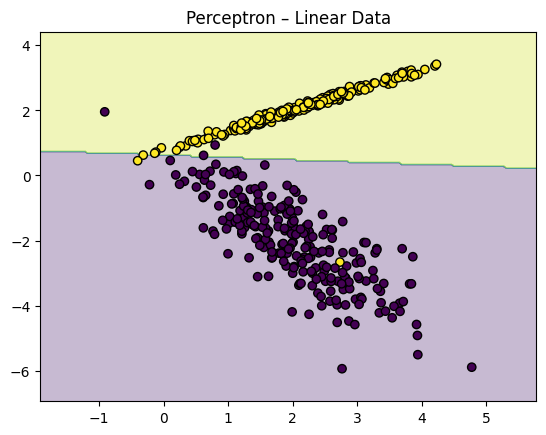

In [67]:
p = Perceptron()
p.fit(Xl_train, yl_train)

y_pred_linear = p.predict(Xl_test)
print("Perceptron Accuracy (Linear Data):",
      accuracy(yl_test, y_pred_linear))

plot_decision_boundary(p, X_linear, y_linear,
                       "Perceptron – Linear Data")

# Step 9: Test Perceptron on Non-Linear Data

Perceptron Accuracy (Non-Linear Data): 0.83


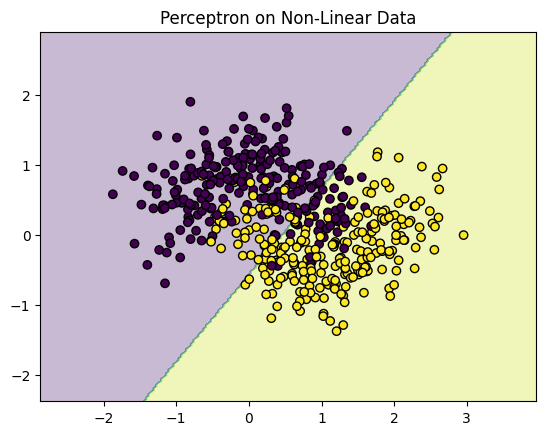

In [68]:
p.fit(Xn_train, yn_train)
y_pred_nonlinear = p.predict(Xn_test)

print("Perceptron Accuracy (Non-Linear Data):",
      accuracy(yn_test, y_pred_nonlinear))

plot_decision_boundary(p, X_nonlinear, y_nonlinear,
                       "Perceptron on Non-Linear Data")

# PART B: Multi-Layer Neural Network (Non-Linear)

# Step 10: Activation Functions

In [69]:
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return z > 0

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step 11: Multi-Layer Neural Network Class

In [70]:
class MLP:
    def __init__(self, input_size, hidden_size, lr=0.01):
        self.lr = lr
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, 1) * 0.01
        self.b2 = np.zeros((1, 1))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y):
        m = X.shape[0]
        dz2 = self.a2 - y.reshape(-1, 1)
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.mean(dz2, axis=0, keepdims=True)

        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * relu_derivative(self.z1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.mean(dz1, axis=0, keepdims=True)

        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def train(self, X, y, epochs=1000):
        for _ in range(epochs):
            self.forward(X)
            self.backward(X, y)

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int).flatten()

# Step 12: Train MLP on Non-Linear Data

MLP Accuracy (Non-Linear Data): 0.84


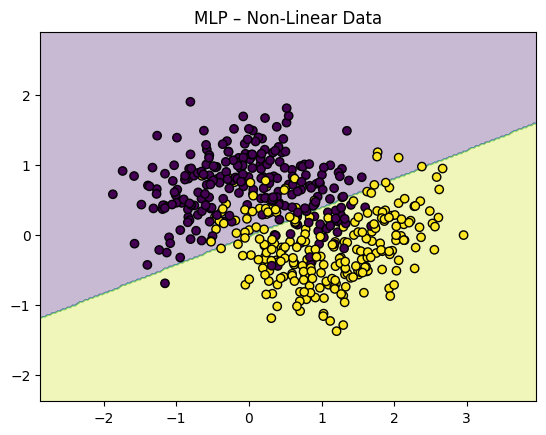

In [71]:
mlp = MLP(input_size=2, hidden_size=10, lr=0.1)
mlp.train(Xn_train, yn_train, epochs=2000)

y_pred_mlp = mlp.predict(Xn_test)
print("MLP Accuracy (Non-Linear Data):",
      accuracy(yn_test, y_pred_mlp))

plot_decision_boundary(mlp, X_nonlinear, y_nonlinear,
                       "MLP – Non-Linear Data")